# Import das bibliotecas

In [2]:
import os
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = os.path.abspath(os.path.dirname(__name__))
path_arquivos = os.path.join(path, 'moc_bus')

# Leitura do Arquivo CSV

In [2]:
df = pd.read_csv(os.path.join(path, 'arquivo_combinado.csv'), delimiter=',')

# Tratamento de alguns dados

In [3]:

# Converter colunas de tempo para datetime, se necessário
df['hsstart'] = pd.to_datetime(df['hsstart'], format="%H:%M:%S")
df['hsstop'] = pd.to_datetime(df['hsstop'], format="%H:%M:%S")

# Calcular a duração como a diferença entre hsstop e hsstart
df['duracao'] = df['hsstop'] - df['hsstart']

df['datai'] = pd.to_datetime(df['datai'], format="%d/%m/%Y")
df['dataf'] = pd.to_datetime(df['dataf'], format="%d/%m/%Y")

# Análise específica por rota
# Número de viagens por rota
viagens_por_rota = df.groupby('linha')['empresa'].count()

# Média de passageiros por rota
media_passageiros_por_rota = df.groupby('linha')['qtpsg'].mean()

# Valor total arrecadado por rota
valor_arrecadado_por_rota = df.groupby('linha')['valor_jornada'].sum()

# Tempo médio de operação por rota
# df['duracao'] = pd.to_datetime(df['hsstop'].astype(str)) - pd.to_datetime(df['hsstart'].astype(str))
tempo_medio_operacao = df.groupby('linha')['duracao'].mean()

# Comparação entre rotas
# Comparação de demanda
demanda_comparativa = df.groupby('linha')['qtpsg'].sum().sort_values(ascending=False)

# Comparação de valores arrecadados
comparacao_valores = df.groupby('linha')['valor_jornada'].sum().sort_values(ascending=False)


In [4]:
df['duracao'] = pd.to_datetime(df['hsstop'].astype(str)) - pd.to_datetime(df['hsstart'].astype(str))

# Distribuição de passageiros por rota por dia

In [5]:
# Agrupar a quantidade de passageiros por dia e por linha
df_agrupado_por_dia = df.groupby(['datai', 'linha'])[['qtpsg', 'valor_jornada']].sum().reset_index()

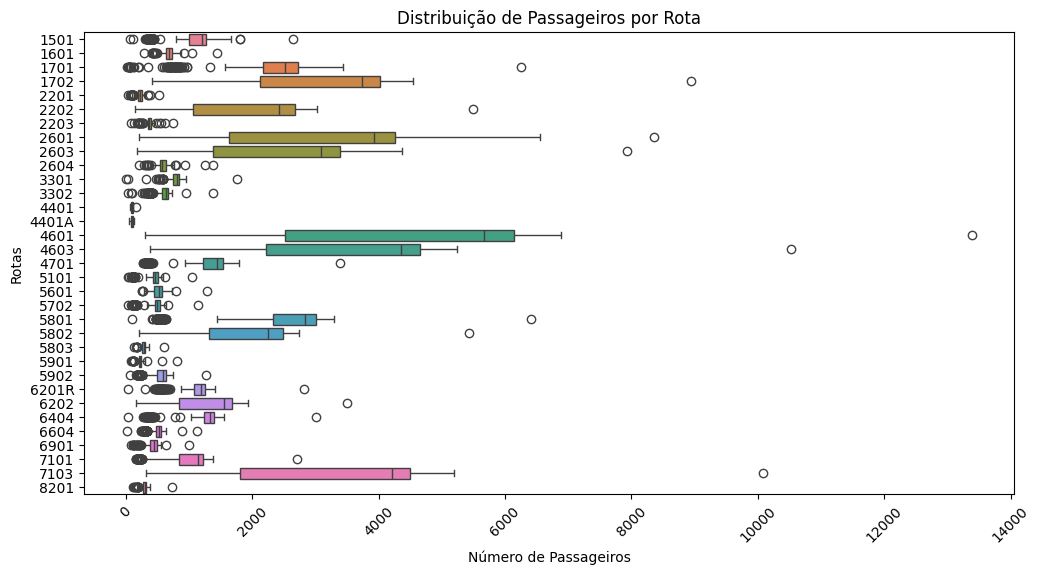

In [6]:
# Gráfico boxplot para a distribuição de passageiros por rota
plt.figure(figsize=(12, 6))
sns.boxplot(x='qtpsg', y='linha', data=df_agrupado_por_dia, hue='linha')
plt.title('Distribuição de Passageiros por Rota')
plt.xlabel('Número de Passageiros')
plt.ylabel('Rotas')
plt.xticks(rotation=45)
plt.show()

# Valor Arrecado por Linha por dia

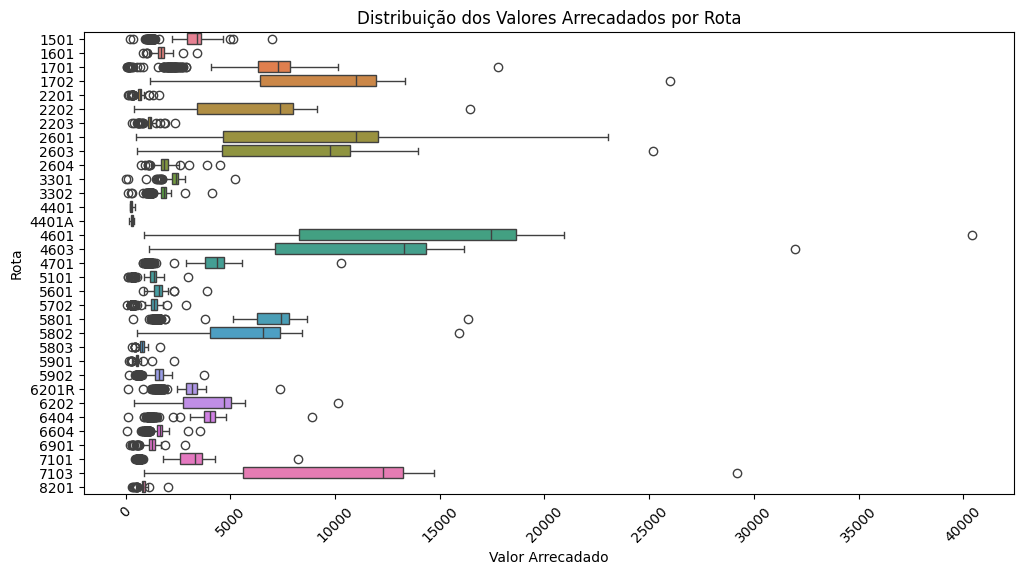

In [7]:
# Gráfico boxplot para a distribuição dos valores arrecadados por rota
plt.figure(figsize=(12, 6))
sns.boxplot(x='valor_jornada', y='linha', data=df_agrupado_por_dia, hue='linha')
plt.title('Distribuição dos Valores Arrecadados por Rota')
plt.ylabel('Rota')
plt.xlabel('Valor Arrecadado')
plt.xticks(rotation=45)
plt.show()

# Tempo de duração de Viagem por Dia

In [8]:
# df['duracao'] = timedelta(pd.to_datetime(df['hsstop'].astype(str)) - pd.to_datetime(df['hsstart'].astype(str))).total_seconds()
df['duracao_minutos'] = df['duracao'].dt.total_seconds() // 60
df['duracao_minutos'] = df['duracao_minutos'].astype(int)

In [9]:
# Agrupar a quantidade de passageiros por dia e por linha
df_duracao_por_dia = df.groupby(['datai', 'linha'])['duracao_minutos'].mean().reset_index()

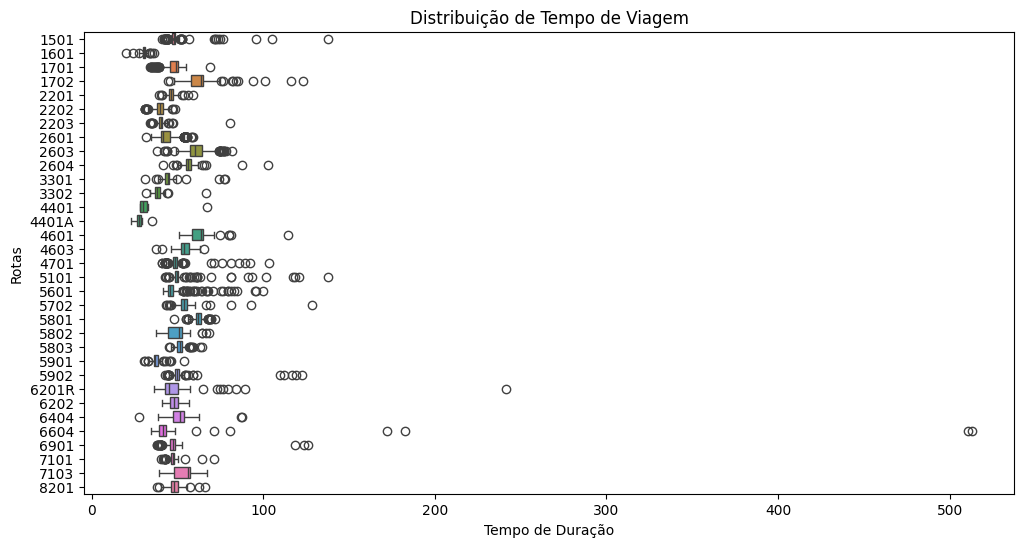

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='duracao_minutos', y='linha', data=df_duracao_por_dia, hue='linha')
plt.title('Distribuição de Tempo de Viagem')
plt.xlabel('Tempo de Duração')
plt.ylabel('Rotas')
plt.show()

# Tempo de duração de Viagem por Mês

In [11]:
df_duracao_por_dia['mes'] = pd.to_datetime(df_duracao_por_dia['datai']).dt.month
df_duracao_por_dia = df_duracao_por_dia[pd.to_datetime(df_duracao_por_dia['datai']).dt.year == 2024]
df_duracao_por_mes = df_duracao_por_dia.groupby(['mes', 'linha'])['duracao_minutos'].mean().reset_index()

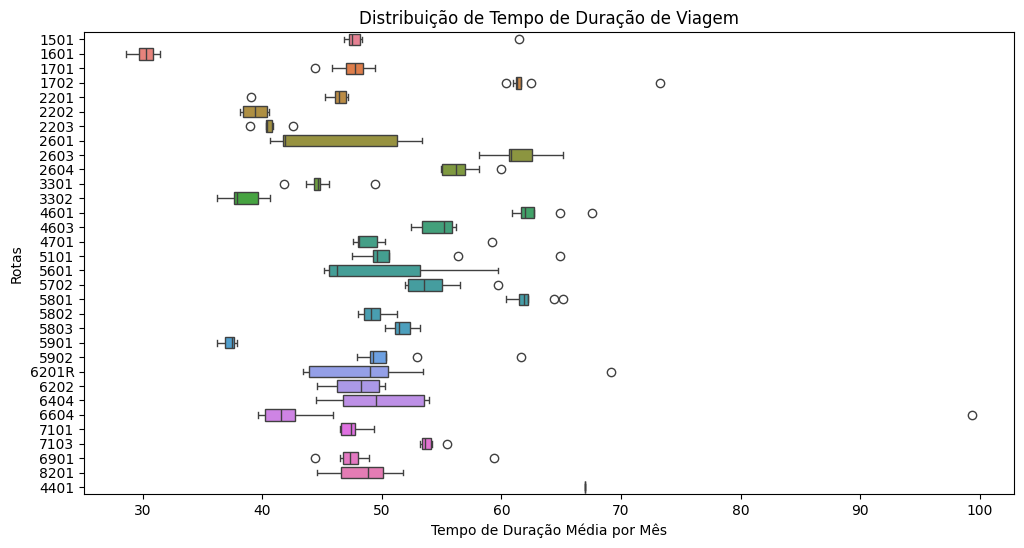

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='duracao_minutos', y='linha', data=df_duracao_por_mes, hue='linha')
plt.title('Distribuição de Tempo de Duração de Viagem')
plt.xlabel('Tempo de Duração Média por Mês')
plt.ylabel('Rotas')
plt.show()

# Tempo médio de Duração de viagem por Linha de Ônibus

In [13]:
df_tempo_duracao_medio = df.groupby('linha')['duracao_minutos'].mean().reset_index()

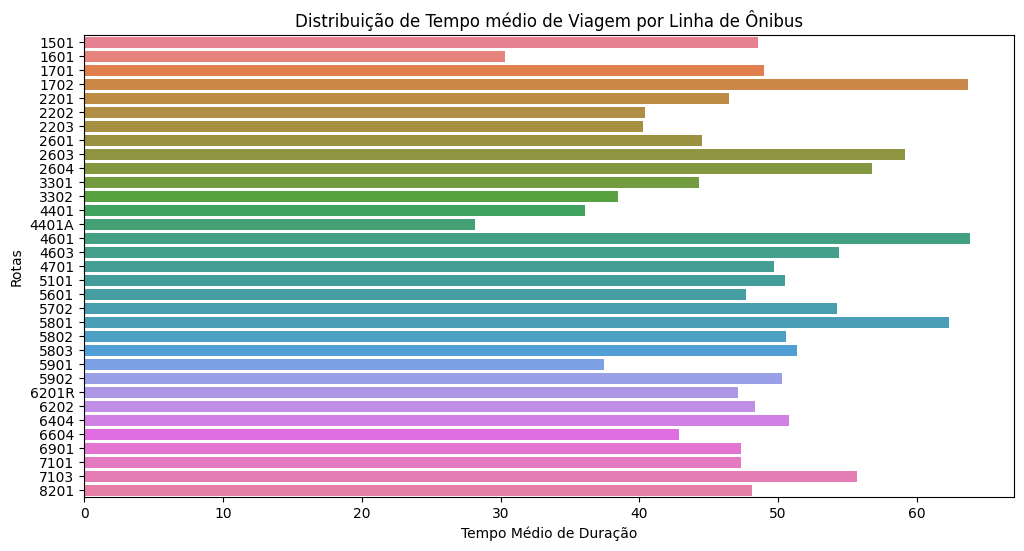

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='duracao_minutos', y='linha', data=df_tempo_duracao_medio, hue='linha')
plt.title('Distribuição de Tempo médio de Viagem por Linha de Ônibus')
plt.xlabel('Tempo Médio de Duração')
plt.ylabel('Rotas')
plt.show()